## A dataset showing the descriptors on housing used to determine the tax paid by each residence.

The Assignment: Using the HousingData dataset to determine, the tax paid per residence in the TestData dataset

In [91]:
#Importing Libraries
import pandas as pd

#importing datasets
df = pd.read_excel(r'HousingData.xlsx')
test = pd.read_csv(r'TestData.csv')

#Drop duplicates if any
df=df.drop_duplicates()
test=test.drop_duplicates()

## Data Exploration

In [92]:
df.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


In [93]:
df.columns

Index(['PID', 'CRIM', 'AC', 'INDUS', 'LS', 'PR', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'DMT', 'LSTAT', 'MO', 'TAX'],
      dtype='object')

In [94]:
df.shape

(506, 15)

In [95]:
df.describe()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,506.000000,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,353.500000,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,146.213884,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,101.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,227.250000,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,353.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,479.750000,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,606.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    int64  
 1   CRIM     504 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       504 non-null    float64
 5   PR       503 non-null    float64
 6   RM       502 non-null    float64
 7   AGE      502 non-null    float64
 8   DIS      503 non-null    float64
 9   RAD      504 non-null    float64
 10  PTRATIO  503 non-null    float64
 11  DMT      502 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MO       504 non-null    float64
 14  TAX      505 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 63.2 KB


In [97]:
#Since values are few, we drop them
df.dropna(inplace=True)

In [98]:
#Null values
df.isnull().sum()

PID        0
CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64

In [99]:
df.nunique()

PID        487
CRIM       485
AC          26
INDUS       76
LS           2
PR          81
RM         433
AGE        344
DIS        396
RAD          9
PTRATIO     46
DMT        363
LSTAT      438
MO          13
TAX         66
dtype: int64

From the of the unique values, LS, RAD are categorical records

## Splitting data into Training and Testing Data

In [100]:
from sklearn.model_selection import train_test_split

X = df.drop(['TAX'], axis=1)
y = df['TAX']
X

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,600,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,19.2,395.77,15.10,5.0
500,601,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,19.2,396.90,14.33,8.0
502,603,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,6.0
503,604,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,9.0


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

train_data = X_train.join(y_train)
train_data

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
19,120,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4.0,21.0,390.95,11.28,0.0,307.0
333,434,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,20.2,389.71,5.68,0.0,224.0
405,506,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,20.2,384.97,22.98,5.0,666.0
356,457,8.98296,0.0,18.10,1.0,0.770,6.212,97.4,2.1222,24.0,20.2,377.73,17.60,0.0,666.0
421,522,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24.0,20.2,319.98,15.70,1.0,666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,366,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,13.0,392.40,10.45,0.0,264.0
101,202,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,20.9,395.58,7.67,0.0,384.0
245,346,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,19.1,389.13,18.46,1.0,330.0
40,141,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,18.3,14.50,1.98,0.0,252.0


array([[<Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'LS'}>, <Axes: title={'center': 'PR'}>,
        <Axes: title={'center': 'RM'}>, <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'RAD'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'DMT'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MO'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: >]], dtype=object)

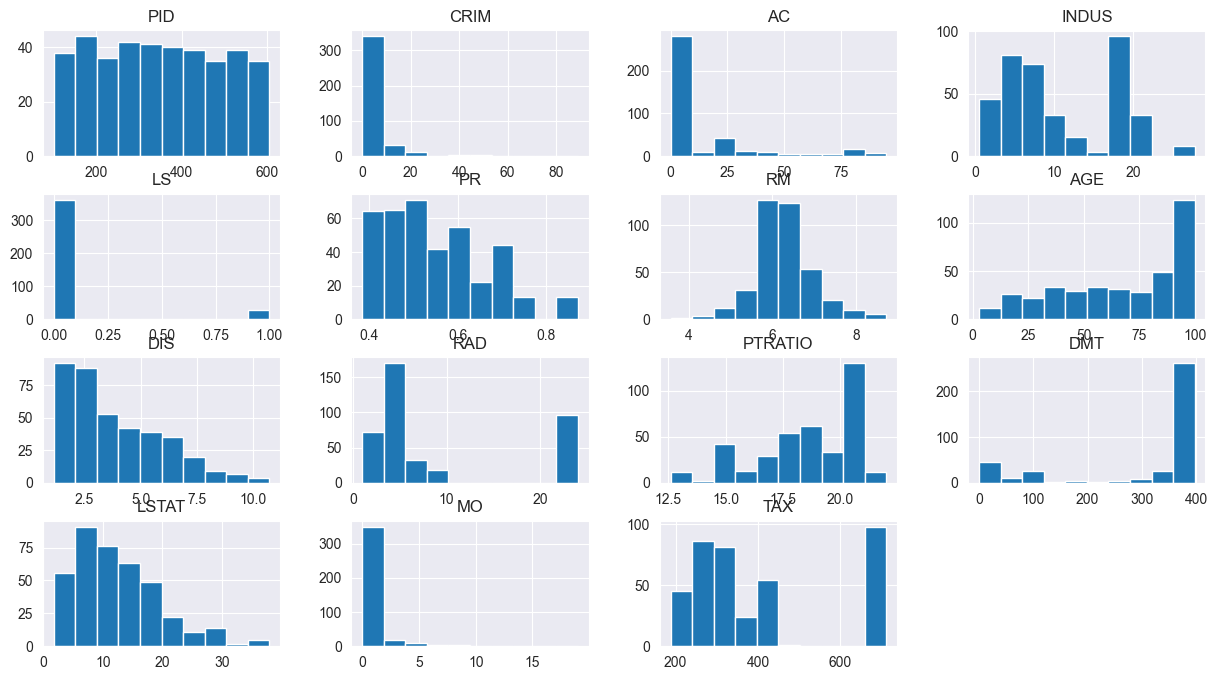

In [102]:
#Visualization of the train_data
train_data.hist(figsize= (15,8))

In [103]:
# Correlation Matrix to determine relationships of variables with the target variable
train_data.corr()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
PID,1.000000,0.410113,-0.100937,0.392983,-0.021048,0.407474,-0.081031,0.216522,-0.296561,0.699633,0.296559,-0.277248,0.281257,0.286999,0.669265
CRIM,0.410113,1.000000,-0.198909,0.417865,-0.063094,0.419358,-0.225026,0.359282,-0.384098,0.624557,0.286602,-0.289990,0.464694,0.302966,0.590582
AC,-0.100937,-0.198909,1.000000,-0.525503,-0.037966,-0.508805,0.315784,-0.540059,0.634116,-0.314531,-0.360711,0.157719,-0.408876,-0.093046,-0.292328
INDUS,0.392983,0.417865,-0.525503,1.000000,0.068045,0.765061,-0.402257,0.629156,-0.703342,0.614985,0.342391,-0.228502,0.607153,0.167197,0.704338
LS,-0.021048,-0.063094,-0.037966,0.068045,1.000000,0.097966,0.035830,0.097093,-0.098913,-0.047481,-0.146736,0.100050,-0.003370,-0.077896,-0.064507
PR,0.407474,0.419358,-0.508805,0.765061,0.097966,1.000000,-0.301311,0.726370,-0.768853,0.609577,0.142831,-0.252537,0.586755,0.153425,0.660596
RM,-0.081031,-0.225026,0.315784,-0.402257,0.035830,-0.301311,1.000000,-0.244938,0.198266,-0.226647,-0.348112,0.173245,-0.615083,-0.090418,-0.292660
AGE,0.216522,0.359282,-0.540059,0.629156,0.097093,0.726370,-0.244938,1.000000,-0.737753,0.456300,0.206043,-0.143327,0.608982,0.153229,0.493890
DIS,-0.296561,-0.384098,0.634116,-0.703342,-0.098913,-0.768853,0.198266,-0.737753,1.000000,-0.493046,-0.164632,0.201315,-0.498755,-0.176675,-0.513769
RAD,0.699633,0.624557,-0.314531,0.614985,-0.047481,0.609577,-0.226647,0.456300,-0.493046,1.000000,0.469780,-0.346336,0.507640,0.270812,0.923695


<Axes: >

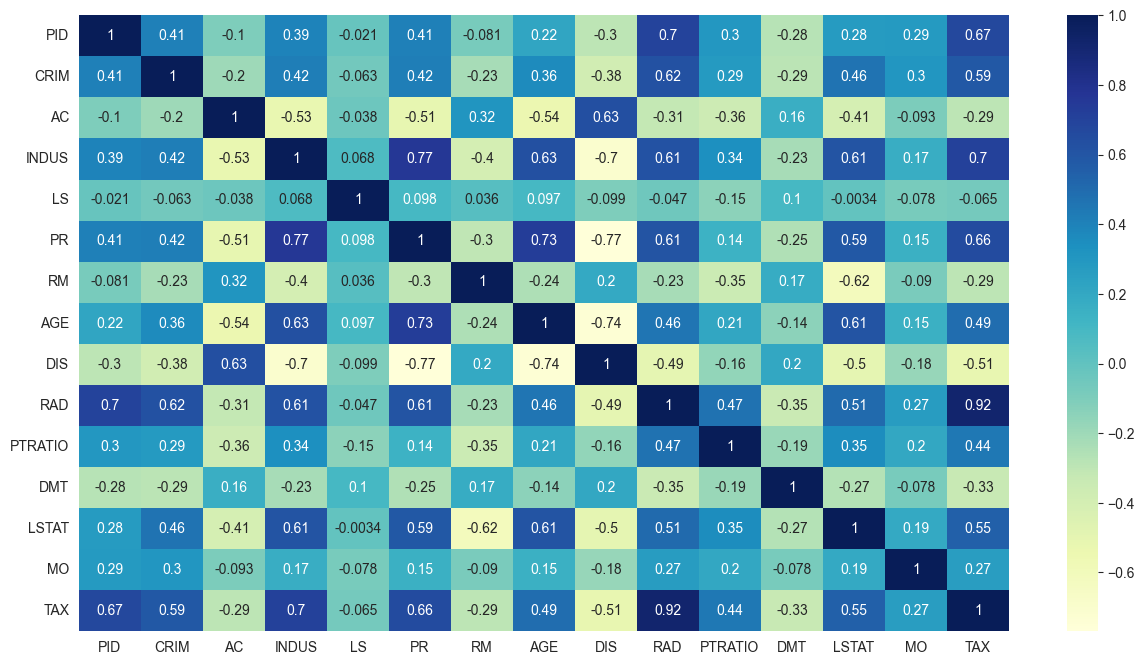

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap= "YlGnBu" )

LSTAT, RAD, PR & PID correlate positively and highly

## Pre-processing

In [105]:
import numpy as np
#Skewed Data
train_data['CRIM'] = np.log(train_data['CRIM'] + 1)
train_data['RAD'] = np.log(train_data['RAD'] + 1)
train_data['MO'] = np.log(train_data['MO'] + 1)

array([[<Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'LS'}>, <Axes: title={'center': 'PR'}>,
        <Axes: title={'center': 'RM'}>, <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'RAD'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'DMT'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MO'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: >]], dtype=object)

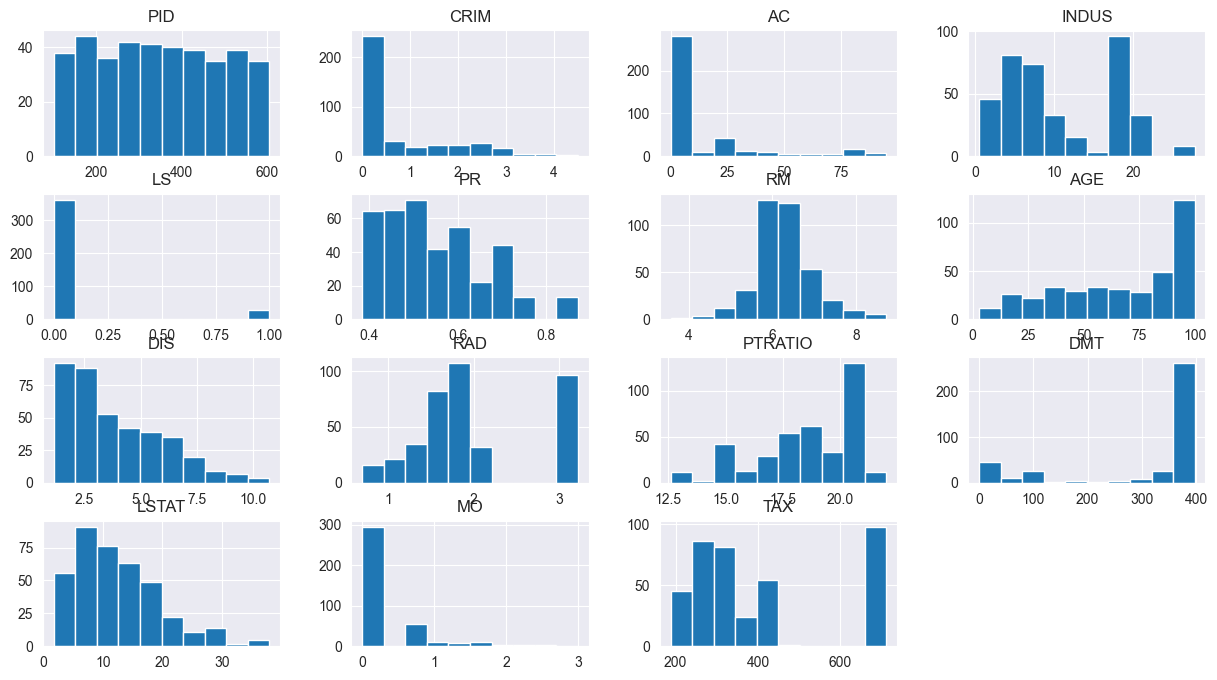

In [106]:
train_data.hist(figsize= (15,8))

## Training Model

In [107]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['TAX'], axis=1), train_data['TAX']

x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      84 non-null     int64  
 1   CRIM     84 non-null     float64
 2   AC       84 non-null     float64
 3   INDUS    84 non-null     float64
 4   LS       84 non-null     int64  
 5   PR       84 non-null     float64
 6   RM       84 non-null     float64
 7   AGE      78 non-null     float64
 8   DIS      84 non-null     float64
 9   RAD      84 non-null     int64  
 10  PTRATIO  84 non-null     float64
 11  DMT      84 non-null     float64
 12  LSTAT    84 non-null     float64
 13  MO       84 non-null     int64  
 14  TAX      0 non-null      float64
dtypes: float64(11), int64(4)
memory usage: 10.5 KB


In [118]:
test.dropna(how='all',axis=0, inplace=True)
test.fillna(0, inplace=True)

In [119]:
test['AGE']=test['AGE'].fillna(test['AGE'].mean())
test.isnull().sum()

PID        0
CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      84 non-null     int64  
 1   CRIM     84 non-null     float64
 2   AC       84 non-null     float64
 3   INDUS    84 non-null     float64
 4   LS       84 non-null     int64  
 5   PR       84 non-null     float64
 6   RM       84 non-null     float64
 7   AGE      84 non-null     float64
 8   DIS      84 non-null     float64
 9   RAD      84 non-null     float64
 10  PTRATIO  84 non-null     float64
 11  DMT      84 non-null     float64
 12  LSTAT    84 non-null     float64
 13  MO       84 non-null     float64
 14  TAX      84 non-null     float64
dtypes: float64(13), int64(2)
memory usage: 10.5 KB


In [121]:
test['CRIM'] = np.log(test['CRIM'] + 1)
test['RAD'] = np.log(test['RAD'] + 1)
test['MO'] = np.log(test['MO'] + 1)

x_test, y_test = test.drop(['TAX'], axis=1), test['TAX']

x_test_s = scaler.fit_transform(x_test)

reg.score(x_test_s, y_test)

0.0

In [122]:
from sklearn.ensemble import RandomForestRegressor



forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [123]:
forest.score(x_test_s, y_test)

0.0

In [124]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [125]:
best_forest = grid_search.best_estimator_

In [126]:
best_forest.score(x_test_s, y_test)

0.0